In [29]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

In [4]:
df = keras.datasets.fashion_mnist

In [5]:
(X_train, y_train),(X_test, y_test) = df.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_train, X_test = X_train/255.0, X_test/255.0

In [8]:
init_1 = keras.initializers.LecunUniform()

In [12]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(80, use_bias=False, kernel_initializer= init_1),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('selu'),
    keras.layers.Dense(60, use_bias=False, kernel_initializer= init_1),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('selu'),
    keras.layers.Dense(40, use_bias=False, kernel_initializer= init_1),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('selu'),
    keras.layers.Dense(10, activation= 'softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
history = model.fit(X_train, y_train, epochs=60 , validation_split=0.15)

Epoch 1/60
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7865 - loss: 0.6177 - val_accuracy: 0.8308 - val_loss: 0.4618
Epoch 2/60
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8442 - loss: 0.4332 - val_accuracy: 0.8567 - val_loss: 0.3949
Epoch 3/60
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8582 - loss: 0.3912 - val_accuracy: 0.8584 - val_loss: 0.3867
Epoch 4/60
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8701 - loss: 0.3552 - val_accuracy: 0.8713 - val_loss: 0.3625
Epoch 5/60
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8771 - loss: 0.3332 - val_accuracy: 0.8772 - val_loss: 0.3406
Epoch 6/60
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8856 - loss: 0.3111 - val_accuracy: 0.8688 - val_loss: 0.3601
Epoch 7/60
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8857 - loss: 0.3113 - val_accuracy: 0.8591 - val_loss: 0.3926
Epoch 8/60
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8925 - loss: 0.2903 -

In [25]:
test_1 =X_test[1001:1004].round(2)

In [26]:
model.evaluate(X_test, y_test, verbose=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8736 - loss: 0.5041


[0.49213725328445435, 0.8755999803543091]

In [27]:
model.predict(test_1).round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


array([[0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.01, 0.  , 0.  , 0.01, 0.  , 0.98, 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [28]:
y_test[1001:1004].round(3)

array([3, 5, 5], dtype=uint8)

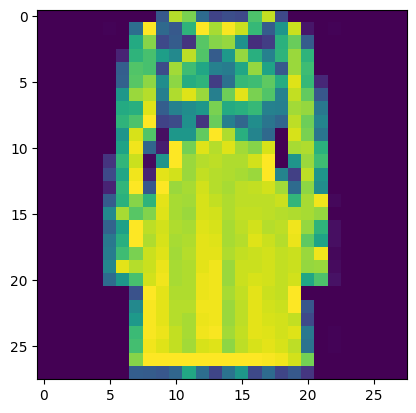

In [30]:
plt.imshow(test_1[0])